# Import libraries and load dataset

In [2]:
# Use pandas to load data from a CSV file
import pandas as pd
# Use numpy for numerical operations
import numpy as np
# Use matplotlib for plotting
import matplotlib.pyplot as plt
# Use seaborn for enhanced plotting
import seaborn as sns
# Use ipaddress to convert IP to binary format
import ipaddress
# Use os for file path operations
import os

# Data Preprocessing

In [12]:
# Specify path to directory of each malware class
malware_types = ['Adware','Benign','Ransomware','Scareware','SMSmalware']

# Each directory in malware_types contains nested directories of different families of malware of that type
# Each nested directory contains multiple CSV files of different samples of that family
# Load all families of data of each type of malware into a single dataframe
malware_data = {}
for malware_type in malware_types:
    malware_df = []
    for subdir in os.listdir(malware_type):
        subdir_path = os.path.join(malware_type, subdir)
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                if file.endswith('.csv'):
                    file_path = os.path.join(subdir_path, file)
                    df = pd.read_csv(file_path)
                    # Drop the old 'Label' column if it exists
                    if 'Label' in df.columns:
                        df.drop(columns=['Label'], inplace=True)
                    df['Label'] = malware_type
                    malware_df.append(df)
    combined_malware_df = pd.concat(malware_df, ignore_index=True)
    malware_data[malware_type] = combined_malware_df

In [18]:
# Drop unneeded columns

# Drop IP columns
for malware_type, df in malware_data.items():
    # Drop columns that are not needed for analysis if they exist
    df.drop(columns=['Flow ID', ' Source IP', ' Destination IP', ' Timestamp'], inplace=True, errors='ignore')

    # Update the malware_data dictionary with the cleaned dataframe
    malware_data[malware_type] = df

# Go through the columns and rename them without whitespace
for malware_type, df in malware_data.items():
    # Rename columns to remove whitespace
    df.columns = [col.strip() for col in df.columns]
    # Update the malware_data dictionary with the renamed dataframe
    malware_data[malware_type] = df

In [19]:
# Print the first sample for each malware type
for malware_type, df in malware_data.items():
    print(f"First sample of {malware_type}:\n{df.head()}\n")

First sample of Adware:
   Source Port  Destination Port  Protocol  Flow Duration  Total Fwd Packets  \
0        54819               443         6            194                  2   
1        51023               443         6              5                  2   
2        39805               443         6         199542                  9   
3        39805               443         6            254                  2   
4          443             36040         6        2164751                  1   

   Total Backward Packets  Total Length of Fwd Packets  \
0                       0                         31.0   
1                       0                         23.0   
2                       8                       1076.0   
3                       0                         23.0   
4                       3                          0.0   

   Total Length of Bwd Packets  Fwd Packet Length Max  Fwd Packet Length Min  \
0                          0.0                   31.0             

In [20]:
# Print the first sample in the first malware type on attribute attribute
attribute = 'Flow Duration'
first_malware_type = malware_types[0]
first_df = malware_data[first_malware_type]
print(f"First sample of {first_malware_type} on attribute '{attribute}':\n{first_df[attribute].head()}\n")

First sample of Adware on attribute 'Flow Duration':
0        194
1          5
2     199542
3        254
4    2164751
Name: Flow Duration, dtype: int64



In [ ]:
# TODO: Do bagging to make a dataset with 50k samples of each class of malware

In [ ]:
# TODO: Split each dataset into train and test sets, with 80:20 for each class, then generate the training and testing sets

In [ ]:
# TODO: Save the split datasets to CSV files (training.csv and testing.csv)

# Dataset Visualization + Data Cleaning (Preprocessing)

In [ ]:
# TODO: Data visualization using correlation matrix

In [ ]:
# TODO: Possible remove some heavily correlated features to save on training time and reduce complexity and overfitting

In [ ]:
# TODO: For certain models that require a sigmoid or some other activation function, convert the values to a range of [0, 1]

Sometimes certain attributes in combination may result in distinct outputs, such as dark skies and people using umbrella may mean that it is raining, but the dataset has too many attributes with overlapping values to try to analyze and find meaning within them. We will leave as many attributes as possible within the dataset in hopes that our model can pick up on those hidden correlations. 

# OLD CODE (TO DELETE ONCE NO LONGER NEEDED)

In [3]:
# Set file path of raw dataset
file_path = 'Darknet.csv'

# Read the dataset
df = pd.read_csv(file_path)

In [16]:
# Visualize attributes which are more categorical in nature
attribute = 'Src Port'

# Group values of a feature by the labels
try:
    grouped = df.groupby('Label')[attribute].value_counts()
except KeyError as e:
    print("Failed to group data: ", e)

# Print grouped data line by line
"""for line in grouped.items():
    print(f"{line[0]}: {line[1]}")"""

# Print the first 5 most frequent features for each label type
for label in grouped.index.levels[0]:
    print(f"\nTop 5 {attribute} for label '{label}':")
    top_values = grouped[label].head(5)
    for value, count in top_values.items():
        print(f"{attribute} {value}: {count} occurances")


Top 5 Src Port for label 'Non-Tor':
Src Port 9100: 9118 occurances
Src Port 80: 6568 occurances
Src Port 443: 4119 occurances
Src Port 51413: 629 occurances
Src Port 34803: 172 occurances

Top 5 Src Port for label 'NonVPN':
Src Port 137: 670 occurances
Src Port 0: 628 occurances
Src Port 17500: 520 occurances
Src Port 443: 502 occurances
Src Port 61009: 448 occurances

Top 5 Src Port for label 'Tor':
Src Port 443: 342 occurances
Src Port 54453: 104 occurances
Src Port 41071: 60 occurances
Src Port 36922: 58 occurances
Src Port 58167: 50 occurances

Top 5 Src Port for label 'VPN':
Src Port 40273: 791 occurances
Src Port 443: 729 occurances
Src Port 15685: 454 occurances
Src Port 49539: 452 occurances
Src Port 51413: 109 occurances


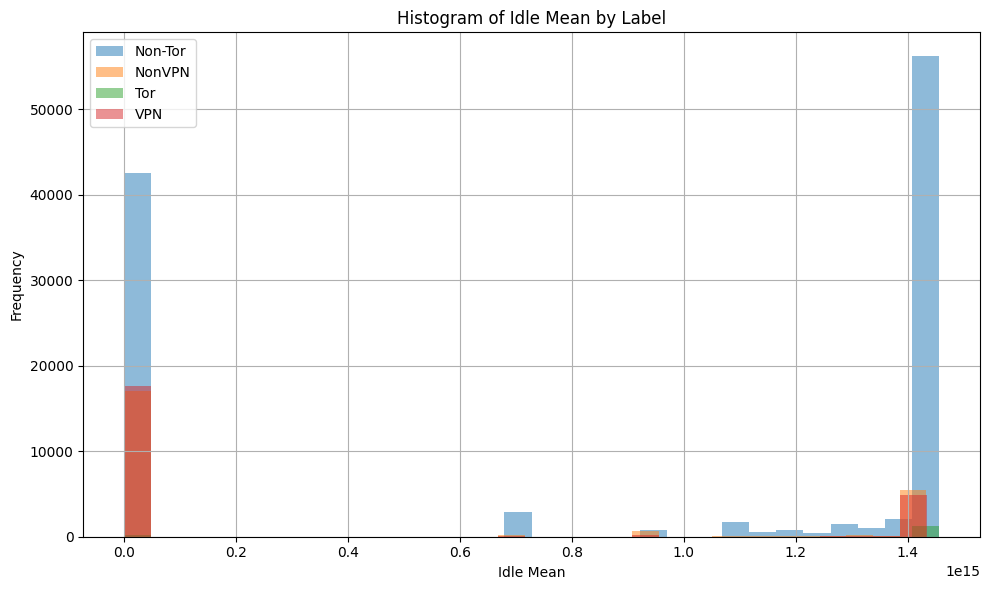

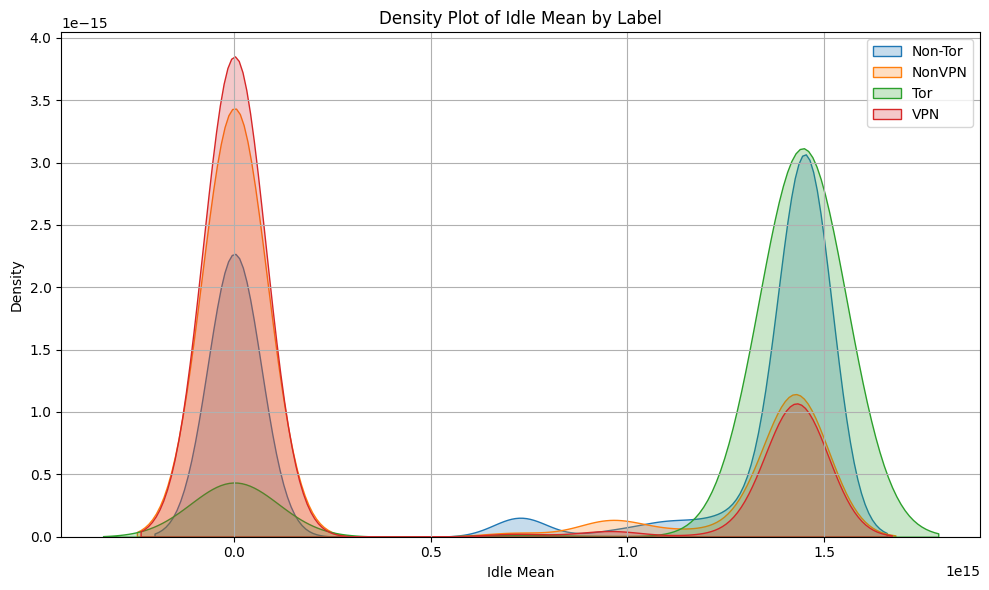

In [ ]:
# Visualize attributes which are more numerical in nature using matplotlib histograms
attribute = 'Idle Mean'

# Get unique labels
labels = ['Non-Tor', 'NonVPN', 'Tor', 'VPN']
# labels = ['NonVPN', 'VPN']

# Initialize a figure for plotting
plt.figure(figsize=(10, 6))

# Plot a histogram for each label
for label in labels:
    subset = df[df['Label'] == label]
    plt.hist(subset[attribute], bins=30, alpha=0.5, label=label, density=False)

plt.title(f"Histogram of {attribute} by Label")
plt.xlabel(attribute)
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize density distribution of attributes using seaborn kdeplot
import seaborn as sns

plt.figure(figsize=(10, 6))

for label in labels:
    subset = df[df['Label'] == label]
    sns.kdeplot(subset[attribute], label=label, fill=True, common_norm=False)

plt.title(f"Density Plot of {attribute} by Label")
plt.xlabel(attribute)
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

"""
Warning: 
Certain labels have more samples than others, which can skew the density plot.
Density graphs are not in scale with other graphs, density is relative to the number of samples for that label.
"""

# Data Pre-Processing & Cleaning

In [ ]:
# Drop unnecessary columns

# Drop the 'Label.1' column if it exists (another label column containing package type: streaming, browsing, email, file, etc.)
df.drop(columns=['Label.1'], inplace=True, errors='ignore')
# Drop the 'Flow ID' column if it exists
df.drop(columns=['Flow ID'], inplace=True, errors='ignore')

# Convert source and destination IP addresses to 32-bit binary as list of ints (sort of one-hot encoding IP addresses)
def ip_to_binary(ip):
    try:
        # Get the integer representation of the IP address and format it as a 32-bit binary string, mapped into a list of integers
        return list(map(int, format(int(ipaddress.ip_address(ip)), '032b')))
    except ValueError:
        # If the value is already a size 32 list, return it as is
        if isinstance(ip, list) and len(ip) == 32:
            return ip
        # If the IP address is invalid, return a list of zeros
        else:
            return [0] * 32
df['Src IP'] = df['Src IP'].apply(ip_to_binary)
df['Dst IP'] = df['Dst IP'].apply(ip_to_binary)

# Drop 'Active Mean', 'Active Std', 'Active Max', 'Active Min' columns if they exist, as there are no values in them
df.drop(columns=['Active Mean', 'Active Std', 'Active Max', 'Active Min'], inplace=True, errors='ignore')

# (Optionally) Drop Idle version of above columns if they exist, as there are no values in them
df.drop(columns=['Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'], inplace=True, errors='ignore')

# Drop 'Timestamp' column since it is not needed for the analysis
# Might be good for training accuracy, but not future data: traffic type is not dependent on datetime
df.drop(columns=['Timestamp'], inplace=True, errors='ignore')

# Print the first few rows of the DataFrame to verify the changes
print(df.head())

                                              Src IP  Src Port  \
0  [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, ...     57158   
1  [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, ...     57159   
2  [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, ...     57160   
3  [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, ...     49134   
4  [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, ...     34697   

                                              Dst IP  Dst Port  Flow Duration  \
0  [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, ...       443            229   
1  [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, ...       443            407   
2  [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, ...       443            431   
3  [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, ...       443            359   
4  [1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, ...     19305       10778451   

   Total Fwd Packet  Total Bwd packets  Total Length of Fwd Packet  \
0                 1                  1        

# Dataset Generation